In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight") #for grid lines

# 1. Data Cleaning
# 2. Exploratory Data Analysis(EDA)
# 3. Data Preprocessing
# 4. Model Building
# 5. Evaluation


In [2]:
df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.iloc[:,0:2] 
#or df.drop(columns=['colname1','colname2'],inplace = True)
#removed unnecessary columns and make sure data is Utf-8 encoded
df.columns = ['label', 'message'] # or df.rename(columns = {v1:'label'}, inplace = True)
df.head() #or df.sample(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [4]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


ham is repeated 4875 times and "Sorry, I'll call later" is repeated 30 times

In [5]:
df.groupby('label').describe() 
#below data says out of 4825 rows 4516 are unique. So there are duplicates present

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
df.duplicated().sum()

403

In [7]:
df = df.drop_duplicates(keep = 'first')
#keep parameter is set to 'first', which means that the first occurrence of each duplicate row 
#will be kept, and all other occurrences will be dropped. Now df.duplicated().sum() = 0

In [8]:
df.isnull().any() #or df.info() or df.isnull().sum()

label      False
message    False
dtype: bool

In [9]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5169 rows and 2 columns


In [10]:
total = df.groupby(['label']).count()
total 

,message
label,
ham,4516
spam,653


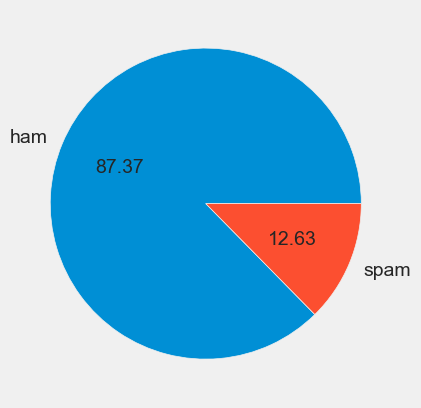

In [11]:
'''plt.figure(figsize=(4,2))
plt.bar(np.array(total.index), height = total['message'],)
plt.ylabel('Total Count') 
Clearly the dataset is imbalanced 
(OR)
'''
plt.pie(df['label'].value_counts(),labels=['ham','spam'], autopct = "%0.2f")
plt.show()

In [12]:
''' classes = {'ham' :0, 'spam': 1}

labels = []
for type in df["label"]:
    labels.append(classes[type]) 
    
(OR)    

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

(OR)    
    '''

df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

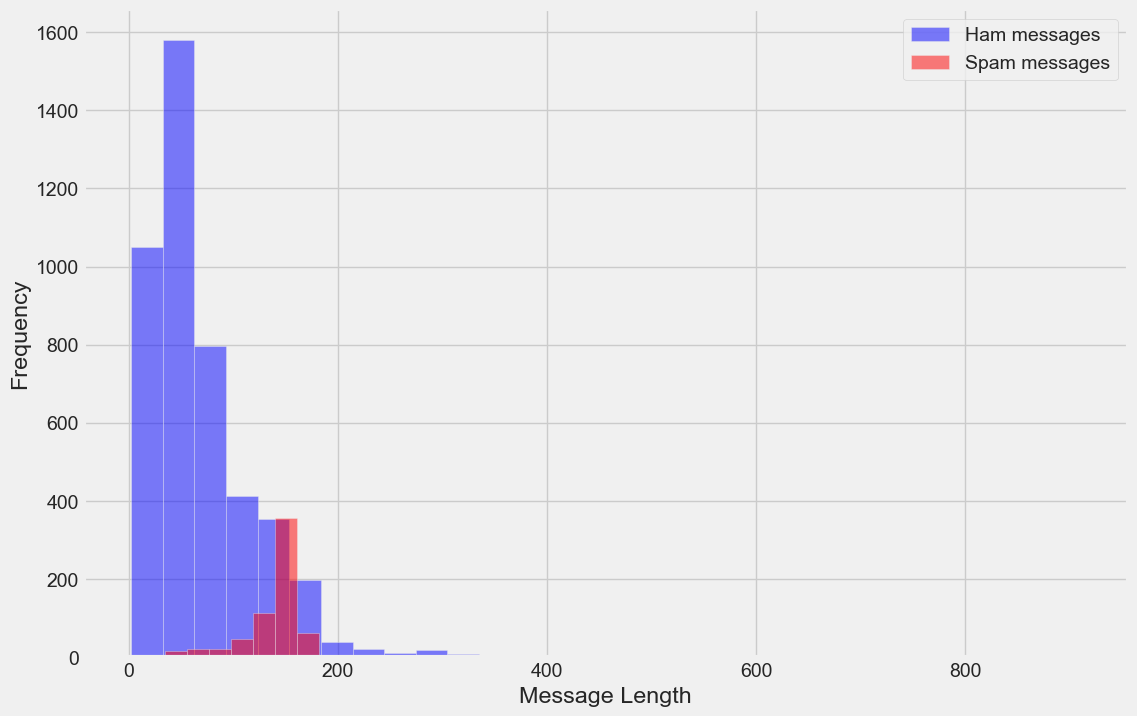

In [14]:
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=30, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.5)
df[df.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.5)
plt.legend()
plt.xlabel("Message Length")

Clearly spam messages are lengthy...

In [15]:
df[df.label=='ham'].describe()

,label_num,message_len
count,4516.0,4516.000000
mean,0.0,70.459256
std,0.0,56.358207
min,0.0,2.000000
25%,0.0,34.000000
50%,0.0,52.000000
75%,0.0,90.000000
max,0.0,910.000000


In [16]:
df[df.message_len == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<AxesSubplot:>

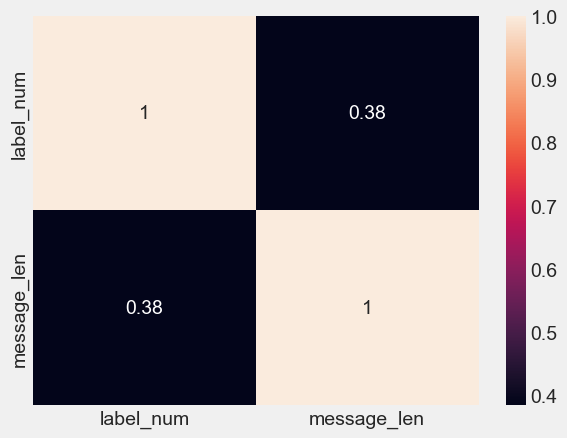

In [17]:
sns.heatmap(df.corr(),annot = True) #Theres a +ve relationship with message_len

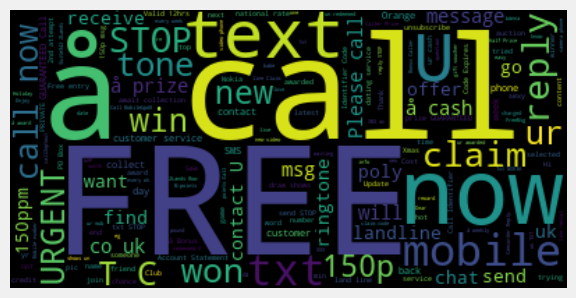

In [18]:
from wordcloud import WordCloud
wc = WordCloud()

spam_messages = df[df["label_num"] == 1]["message"].str.cat(sep=' ')

spam_wc = WordCloud().generate(spam_messages)

plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

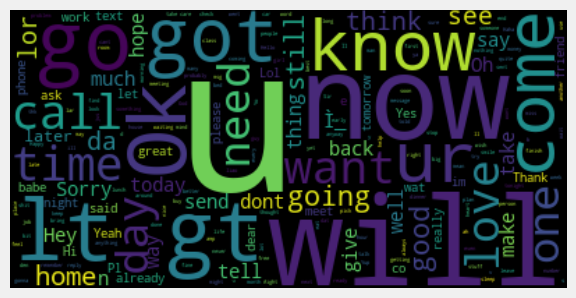

In [19]:
spam_messages = df[df["label_num"] == 0]["message"].str.cat(sep=' ')

# Generate the word cloud
spam_wc = WordCloud().generate(spam_messages)

# Display the word cloud
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Preprocessing

In [20]:
import string
from nltk.corpus import stopwords

def text_process(mess):

    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','ì','û','ï','å','õ']

    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in STOPWORDS])

In [21]:
df['clean_msg'] = df.message.apply(text_process)

df.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goes usf lives around though


In [22]:
from collections import Counter

words = df[df.label=='ham'].clean_msg.apply(lambda x: x.split())
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 295), ('ltgt', 254), ('ok', 246), ('go', 239), ('got', 225), ('know', 221), ('like', 219), ('come', 208), ('ill', 205), ('good', 205), ('call', 184), ('time', 181), ('love', 168), ('day', 168), ('going', 162), ('want', 159), ('lor', 157), ('one', 155), ('need', 152), ('home', 151), ('still', 141), ('see', 133), ('think', 126), ('back', 126), ('da', 124), ('well', 124), ('r', 120), ('sorry', 119), ('n', 118), ('tell', 116), ('today', 115), ('hi', 112), ('take', 109), ('oh', 108), ('send', 108), ('much', 108), ('hey', 106), ('cant', 103), ('night', 101), ('later', 99), ('hope', 96), ('great', 94), ('way', 94), ('happy', 94), ('wat', 91), ('thats', 91), ('already', 89), ('give', 89), ('ask', 87), ('make', 85)]


In [23]:
words = df[df.label=='spam'].clean_msg.apply(lambda x: x.split())
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 303), ('free', 188), ('txt', 126), ('mobile', 105), ('text', 103), ('stop', 103), ('claim', 96), ('reply', 93), ('prize', 81), ('get', 69), ('new', 64), ('urgent', 58), ('send', 57), ('nokia', 54), ('cash', 51), ('contact', 51), ('service', 48), ('win', 47), ('please', 47), ('phone', 43), ('guaranteed', 42), ('per', 41), ('customer', 40), ('18', 38), ('tone', 38), ('16', 37), ('week', 37), ('chat', 35), ('draw', 33), ('awarded', 31), ('mins', 31), ('line', 31), ('go', 30), ('latest', 29), ('message', 29), ('shows', 29), ('150ppm', 29), ('å£2000', 29), ('landline', 29), ('1', 28), ('å£1000', 28), ('want', 28), ('video', 28), ('receive', 27), ('code', 27), ('holiday', 27), ('number', 27), ('msg', 26), ('box', 26), ('tcs', 26)]


In [24]:
from sklearn.model_selection import train_test_split

X = df.clean_msg
y = df.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5169,)
(5169,)
(3876,)
(1293,)
(3876,)
(1293,)


# Model Building

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

print(type(X_train_dtm), X_train_dtm.shape)

X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (3876, 7845)
<class 'scipy.sparse._csr.csr_matrix'> (1293, 7845)


In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<3876x7845 sparse matrix of type '<class 'numpy.float64'>'
	with 31805 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [28]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [29]:
from sklearn import metrics

X_test_dtm = tfidf_transformer.transform(X_test_dtm)
y_pred_class = nb.predict(X_test_dtm)

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))


print("\n=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.9729311678267595

=======Confision Matrix===========


array([[1125,    3],
       [  32,  133]], dtype=int64)

In [30]:
X_test[(y_pred_class==1) & (y_test==0)] #False Positives

3362                free
494     free nowcan call
990            26th july
Name: clean_msg, dtype: object

In [31]:
X_test[(y_pred_class==0) & (y_test==1)] # False negatives

855     talk sexy make new friends fall love worlds di...
4752    cashbincouk get lots cash weekend wwwcashbinco...
2294                1 new message please call 08718738034
5       freemsg hey darling 3 weeks word back id like ...
1429    sale arsenal dartboard good condition doubles ...
1153    1000s girls many local r virgins r ready 4fil ...
5381                       1 new message call 02070836089
4904    warner village 83118 c colin farrell swat wken...
2698                                 88066 lost å£12 help
5110                1 new message please call 08715205273
2268                         88066 88066 lost 3pound help
4247    accordingly repeat text word ok mobile phone send
4296    thesmszonecom lets send free anonymous masked ...
226     meet dream partner soon career flyng start fin...
2963    ever notice youre driving anyone going slower ...
730     email alertfrom jeri stewartsize 2kbsubject lo...
4819    check choose babe videos smsshsexnetun fgkslpo...
1637    0anetw

In [32]:
# calculate AUC

y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

metrics.roc_auc_score(y_test, y_pred_prob)

0.9822157747689663

In [33]:
X_test_dtm1 = vect.transform(["hi i am pavan nice to meet u"])
X_test_dtm1 = tfidf_transformer.transform(X_test_dtm1)

y_pred_prob = nb.predict(X_test_dtm1)
y_pred_prob # O means ham

array([0], dtype=int64)

In [34]:
X_test_dtm2 = vect.transform(["Free entry and win discount of 20% on 21st May 2005. Text us to receive entry questions T&C's apply only over18's"])
X_test_dtm2 = tfidf_transformer.transform(X_test_dtm2)

y_pred_prob = nb.predict_proba(X_test_dtm2)
y_pred_prob # 1 means spam

array([[0.04505936, 0.95494064]])

# The probability of above text belonging to class 1 i.e spam is 95% and probablity that it belongs to ham is 4%. So it's a spam message...